In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
cd "drive/My Drive/SIH"

/content/drive/My Drive/SIH


Chicago_Crimes_2012_to_2017.csv


In [ ]:
import pandas as pd
import sys
sys.path.append("../utils/")
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df.columns

NameError: ignored

In [ ]:
df = pd.read_csv("Chicago_Crimes_2012_to_2017.csv",index_col = False)
df.head()
df.drop("Unnamed: 0",axis=1)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456709,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1034,10.0,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,731,7.0,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,825,8.0,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,423,4.0,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"


In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [ ]:
def time_convert(date_time):
    s1 = date_time[:11]
    s2 = date_time[11:]
    
    month = s1[:2]
    date = s1[3:5]
    year = s1[6:10]
    
    hr = s2[:2]
    mins = s2[3:5]
    sec = s2[6:8]
    time_frame = s2[9:]
    if(time_frame == 'PM'):
        if (int(hr) != 12):
            hr = str(int(hr) + 12)
    else:
        if(int(hr) == 12):
            hr = '00'
    
    final_date = datetime(int(year), int(month), int(date), int(hr), int(mins), int(sec))
    return final_date

In [ ]:
df['Date'] = df['Date'].apply(time_convert)

In [ ]:
df['Date'].head()

0   2016-05-03 23:40:00
1   2016-05-03 21:40:00
2   2016-05-03 23:31:00
3   2016-05-03 22:10:00
4   2016-05-03 22:00:00
Name: Date, dtype: datetime64[ns]

In [ ]:
def month_col(x):
    return int(x.strftime("%m"))
df['Month'] = df['Date'].apply(month_col)

# Feature Engineering 2 : Day
def day_col(x):
    return int(x.strftime("%w"))
df['Day'] = df['Date'].apply(day_col)  

# Feature Engineering 3 : Hour
def hour_col(x):
    return int(x.strftime("%H"))
df['Hour'] = df['Date'].apply(hour_col)

In [ ]:
df.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
0,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,2,23
1,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,2,21
2,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,2,23
3,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,2,22
4,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,2,22


In [ ]:
top_10 = list(df['Primary Type'].value_counts().head(10).index)

print(top_10)


def filter_top_10(df):
    df2=df[df['Primary Type']=='THEFT']
    for crime in top_10[1:]:
        temp=df[df['Primary Type']==crime]
        df2 = df2.append(temp, ignore_index=True)
    return df2
    
df2=filter_top_10(df) # the dataframe with all the data of only the top 10 crimes
df2.shape
df2.head()


['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'ASSAULT', 'OTHER OFFENSE', 'BURGLARY', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT', 'ROBBERY']


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
0,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,2,22
1,2193,10508717,HZ250415,2016-05-03 17:30:00,011XX W JACKSON BLVD,0890,THEFT,FROM BUILDING,OTHER,False,False,1232,12.0,2.0,28.0,06,1168776.0,1898793.0,2016,05/10/2016 03:56:50 PM,41.877812,-87.655758,"(41.877811861, -87.655758012)",5,2,17
2,2279,10508724,HZ250513,2016-05-03 09:00:00,028XX S DR MARTIN LUTHER KING JR DR,0820,THEFT,$500 AND UNDER,STREET,False,False,133,1.0,4.0,35.0,06,1179375.0,1886199.0,2016,05/10/2016 03:56:50 PM,41.843017,-87.617227,"(41.843016958, -87.61722727)",5,2,9
3,2477,10508728,HZ250505,2016-05-03 22:08:00,016XX N CLAREMONT AVE,0810,THEFT,OVER $500,STREET,False,False,1434,14.0,1.0,24.0,06,1160444.0,1910787.0,2016,05/10/2016 03:56:50 PM,41.910901,-87.686019,"(41.910900826, -87.686018747)",5,2,22
4,3023,10508738,HZ250440,2016-05-03 21:45:00,020XX W LE MOYNE ST,0810,THEFT,OVER $500,STREET,False,False,1424,14.0,1.0,24.0,06,1162515.0,1909832.0,2016,05/10/2016 03:56:50 PM,41.908237,-87.678437,"(41.908237096, -87.678437417)",5,2,21


In [ ]:
df2[['Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'Location', 'X Coordinate', 'Y Coordinate']].head()

,Domestic,Beat,District,Ward,Community Area,FBI Code,Location,X Coordinate,Y Coordinate
0,True,1523,15.0,28.0,25.0,06,"(41.886297242, -87.761750709)",1139890.0,1901675.0
1,False,1232,12.0,2.0,28.0,06,"(41.877811861, -87.655758012)",1168776.0,1898793.0
2,False,133,1.0,4.0,35.0,06,"(41.843016958, -87.61722727)",1179375.0,1886199.0
3,False,1434,14.0,1.0,24.0,06,"(41.910900826, -87.686018747)",1160444.0,1910787.0
4,False,1424,14.0,1.0,24.0,06,"(41.908237096, -87.678437417)",1162515.0,1909832.0


In [ ]:
cri5 = df2.groupby(['Month','Day','District','Hour','Community Area'], as_index=False).agg({"Primary Type":"count"})
cri5 = cri5.sort_values(by=['District'], ascending=False)
cri5.head()

,Month,Day,District,Hour,Community Area,Primary Type
100643,7,0,31.0,9,76.0,1
164744,10,6,31.0,9,69.0,1
62653,4,5,31.0,17,27.0,1
39351,3,2,31.0,11,49.0,1
155325,10,2,31.0,11,69.0,1


In [ ]:


cri6=cri5.rename(index=str, columns={"Primary Type":"Crime_Count"})
dummy = cri6.sort_values('Crime_Count',ascending=False)
dummy.head()

,Month,Day,District,Hour,Community Area,Crime_Count
1824,1,0,18.0,2,8.0,72
157733,10,4,1.0,12,32.0,68
133569,9,0,18.0,1,8.0,66
83374,6,0,18.0,1,8.0,64
69754,5,2,1.0,12,32.0,63


In [ ]:
cri6.columns

Index(['Month', 'Day', 'District', 'Hour', 'Community Area', 'Crime_Count'], dtype='object')

In [ ]:

print("Highest Crime Count at any community at any time point:", cri6["Crime_Count"].max())
print("Lowest Crime Count at any community at any time point:", cri6["Crime_Count"].min())

Highest Crime Count at any community at any time point: 72
Lowest Crime Count at any community at any time point: 1


In [ ]:
cri6 = cri6[['Month','Day','District','Hour','Crime_Count','Community Area']]
cri6.head()
print("The shape of our final dataset is:", cri6.shape)



The shape of our final dataset is: (197171, 6)


In [ ]:
lower = np.mean(cri6['Crime_Count'])-0.75*np.std(cri6['Crime_Count'])
higher = np.mean(cri6['Crime_Count'])+0.75*np.std(cri6['Crime_Count'])
print(lower, higher)

1.595468090574692 12.000050520174351


Text(0.5, 1.0, 'Crime Count Distribution')

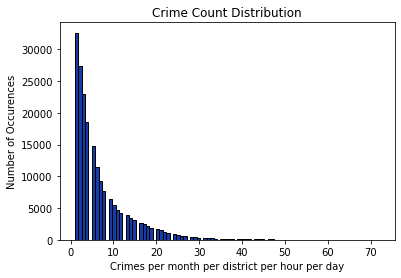

In [ ]:
plt.hist(x='Crime_Count', data=cri6,bins=90,linewidth=1,edgecolor='black', color='#163ca9')
#plt.title("Distribution of Crimes in Chicago", fontfamily="Agency FB", fontsize=25)
plt.xlabel("Crimes per month per district per hour per day")
plt.ylabel("Number of Occurences")
plt.title("Crime Count Distribution")
# plt.savefig("../results/plots/Distribution of crimes.png")

In [ ]:
def crime_rate_assign(x):
    if(x<=2):
        return 0
    elif(x>2 and x<=12):
        return 1
    else:
        return 2
cri6['Alarm'] = cri6['Crime_Count'].apply(crime_rate_assign)
cri6 = cri6[['Month','Day','Hour','District','Crime_Count','Community Area','Alarm']]    
cri6


,Month,Day,Hour,District,Crime_Count,Community Area,Alarm
100643,7,0,9,31.0,1,76.0,0
164744,10,6,9,31.0,1,69.0,0
62653,4,5,17,31.0,1,27.0,0
39351,3,2,11,31.0,1,49.0,0
155325,10,2,11,31.0,1,69.0,0
...,...,...,...,...,...,...,...
25616,2,4,10,1.0,19,32.0,2
25617,2,4,10,1.0,3,33.0,1
25618,2,4,10,1.0,1,35.0,0
25619,2,4,11,1.0,6,28.0,1


In [ ]:
cri6['Alarm'].value_counts()

1    105338
0     60060
2     31773
Name: Alarm, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
import pickle


X = cri6[['Month', 'Day', 'Hour', 'District','Community Area']] # independent
y = cri6['Alarm'] # dependent

# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=500) # 75:25 split

# print(X_train)
# print('hi')
# print(X_test)
# Creating tree
d_tree = DecisionTreeClassifier(random_state=101)
# Fitting tree
d_tree = d_tree.fit(X_train, y_train)
pickle.dump(d_tree,open('model.pkl','wb'))
# Predicting !
y_pred = d_tree.predict(X_test)

# Model Evaluation
# print(y_test)
# print(y_pred)
print("Accuracy:",(metrics.accuracy_score(y_test, y_pred)*100),"\n")

# Confusion Matrix for evaluating the model
cm = pd.crosstab(y_test, y_pred, rownames=['Actual Alarm'], colnames=['Predicted Alarm'])
print("\n----------Confusion Matrix------------------------------------")
print(cm)

# Classification Report
print("\n----------Classification Report------------------------------------")
print(classification_report(y_test,y_pred))

# Unweighted Average Recall
print("\nUAR ->",((cm[0][0])/(cm[0][0]+cm[1][0]+cm[2][0])+(cm[1][1])/(cm[0][1]+cm[1][1]+cm[2][1])+(cm[2][2])/(cm[2][2]+cm[0][2]+cm[1][2]))/3)


Accuracy: 67.49043293835585 


----------Confusion Matrix------------------------------------
Predicted Alarm      0      1     2
Actual Alarm                       
0                12174   7628    27
1                 7866  24143  2841
2                   19   2772  7597

----------Classification Report------------------------------------
              precision    recall  f1-score   support

           0       0.61      0.61      0.61     19829
           1       0.70      0.69      0.70     34850
           2       0.73      0.73      0.73     10388

    accuracy                           0.67     65067
   macro avg       0.68      0.68      0.68     65067
weighted avg       0.68      0.67      0.68     65067


UAR -> 0.6793476271943666
